In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.iloc[:,1:]

,Ground Temperature
0,88.6
1,71.6
2,93.3
3,84.3
4,80.6
5,75.2
6,69.7
7,71.6
8,69.4
9,83.3


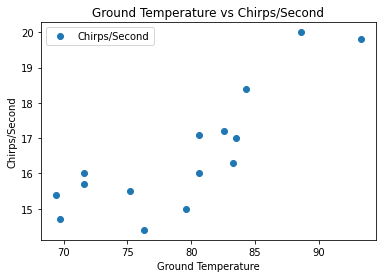

In [ ]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='o')

plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


spliting the data

In [ ]:
X = df.iloc[:,1:].values # features as arrays
y = df.iloc[:,:-1].values # target as arrays
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #initialising
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

modeling

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression(fit_intercept = True) #initialise my Linear Regression predictedScore = m * Ground Temprature + c
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_)#c
print(regressor.coef_)#m

[16.24]
[[1.32929429]]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred


array([[17.07314352],
       [16.71169297],
       [15.73577648],
       [18.15749516],
       [17.19965121]])

In [ ]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))#y_test = truevalue, y_pred=predicted value
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.6986192096619466
Mean Squared Error: 0.8853323688421874
R2- SCORE: 0.6166728572730398


In [ ]:
regressor.fit(X,y)

LinearRegression()

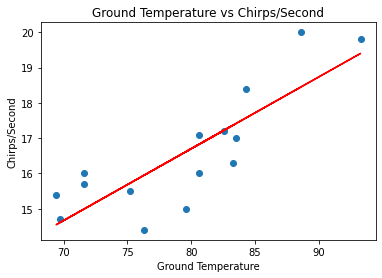

In [ ]:

plt.scatter(df['Ground Temperature'],df['Chirps/Second'])
plt.plot(X,regressor.predict(X),color='r')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

extrapolation


In [ ]:
regressor.predict(scaler.transform([[95]])) # perils of extrapolation

array([[0.9287735]])

interpolation

In [ ]:

scaler.inverse_transform((18-regressor.intercept_)/(regressor.coef_))

array([[713.54529295]])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.nunique

<bound method DataFrame.nunique of       Brain   Body
0     3.385   44.5
1     0.480   15.5
2     1.350    8.1
3   465.000  423.0
4    36.330  119.5
..      ...    ...
57  160.000  169.0
58    0.900    2.6
59    1.620   11.4
60    0.104    2.5
61    4.235   50.4

[62 rows x 2 columns]>

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df = df[(df['Body']<408)&(df["Brain"]<119)]
df

,Brain,Body
0,3.385,44.50
1,0.480,15.50
2,1.350,8.10
4,36.330,119.50
5,27.660,115.00
6,14.830,98.20
7,1.040,5.50
8,4.190,58.00
9,0.425,6.40
10,0.101,4.00


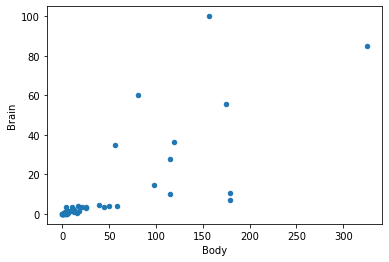

In [ ]:
df.plot.scatter(x="Body",y="Brain")

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.770497
Body,0.770497,1.000000


In [ ]:
X = df.iloc[:,1:].values # features as arrays
y = df.iloc[:,:1].values # target as arrays
# Syntax : dataset.loc[:, :-1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
y_train.shape,y_test.shape

((37, 1), (13, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #initialising
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression(fit_intercept = True) #initialise my Linear Regression predictedScore = m * Ground Temprature + c
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_)#c
print(regressor.coef_)#m

[10.73062162]
[[13.90301123]]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([[14.39141618],
       [ 6.31671759],
       [ 1.76552384],
       [ 1.05592911],
       [ 1.42296087],
       [ 0.27292804],
       [79.72306841],
       [ 5.33796624],
       [ 0.49314709],
       [ 0.26069364],
       [ 0.66442857],
       [ 4.3592149 ],
       [ 0.28026867]])

In [ ]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))#y_test = truevalue, y_pred=predicted value
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1.9393943322395104
Mean Squared Error: 11.530737500129998
R2- SCORE: 0.976890366357779


In [ ]:
regressor.fit(X,y)

LinearRegression()

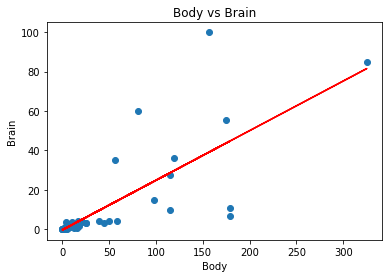

In [ ]:
plt.scatter(df['Body'],df['Brain'])
plt.plot(X,regressor.predict(X),color='r')
plt.title('Body vs Brain')
plt.xlabel('Body')
plt.ylabel('Brain')
plt.show()

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [ ]:
X = df.iloc[:,:-1].values # features as arrays
y = df['Salary'].values # target as array
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #initialising
scaler.fit(X_train) # find the values of mu and sigma
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression(fit_intercept = True) #initialise my Linear Regression predictedScore = m * Ground Temprature + c
regressor.fit(X_train_scaled, y_train) #Learning happens - GD is done and we get the final values of m and c
print(regressor.intercept_)#c
print(regressor.coef_)#m

23258.756097560974
[  449.51719555  4756.90461911  2146.99940891  -990.88077681
 -1857.00354821]


In [ ]:
y_pred = regressor.predict(X_test_scaled) # given the features of the test dataset, it will give the final predictions
y_pred

array([17140.86601256, 17967.69663021, 19391.50968043, 17140.86601256,
       17735.54399685, 31546.81566866, 27885.3562143 , 29021.64330067,
       27626.72942166, 22722.21363887, 29392.66244878])

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 3266.4208565334
Mean Squared Error: 19543084.612747587
R2- SCORE: 0.7011602686502283


In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Sex', 'Rank', 'Year',"Degree"
       'YSdeg'],selector.support_))

[('Sex', False), ('Rank', True), ('Year', True), ('DegreeYSdeg', False)]

From above predictions sex is not a factor in salary